In [34]:
from src.torch_loader import VectorizeParagraph, DatasetFromRepo
from transformers import GPT2Tokenizer
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import numpy as np
import random

In [35]:
JSON_FILE_PATH = "data/ent_sum/"

In [36]:
novels_dataset = DatasetFromRepo(path=JSON_FILE_PATH, transform=lambda x:x)

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
vectorize_paragraph = VectorizeParagraph(tokenizer, block_size=5000) # Changed from 1020

In [37]:
def nb_entities(example):
    return len(example[2]['persons'])

def nb_gpt2_tokens(example):
    return vectorize_paragraph(example).shape[0]

def string_after_vectorization(example):
    return tokenizer.decode(vectorize_paragraph(example))

def nb_chars(example):
    return len(string_after_vectorization(example))

def nb_space_tokens(example):
    return len(string_after_vectorization(example).split(" "))

In [38]:
stats = pd.DataFrame(columns=['example_idx', 'nb_entities', 'nb_chars', 'nb_space_tokens', 'nb_gpt2_tokens', 'token_overflow'])

In [45]:
nb_samples = 5000
for i in tqdm(range(nb_samples)):
    idx = random.randint(0, len(novels_dataset)-1)
    example = novels_dataset[idx]
    
    nb_gpt2 = nb_gpt2_tokens(example)
    nb_gpt2 += nb_gpt2 / 3 * 0.5
    
    stats.loc[i] = [idx, 
                    nb_entities(example),
                    nb_chars(example),
                    nb_space_tokens(example),
                    nb_gpt2,
                    (nb_gpt2 - 1020) / nb_gpt2]

In [46]:
nb_example_with_zero_entities = np.sum(stats["nb_entities"] == 0)
print("% of examples with zero entities :", nb_example_with_zero_entities/nb_samples)

% of examples with zero entities : 1.0


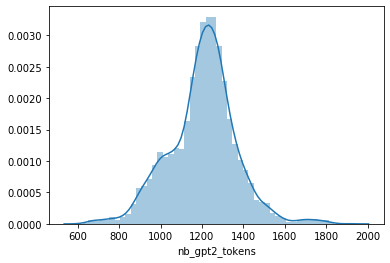

In [47]:
sns.distplot(stats["nb_gpt2_tokens"])

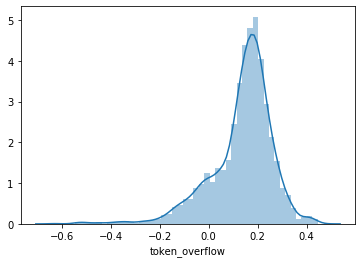

In [48]:
sns.distplot(stats["token_overflow"])

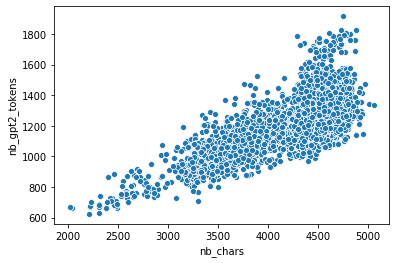

In [49]:
sns.scatterplot(x=stats['nb_chars'], y=stats['nb_gpt2_tokens'], data=stats)

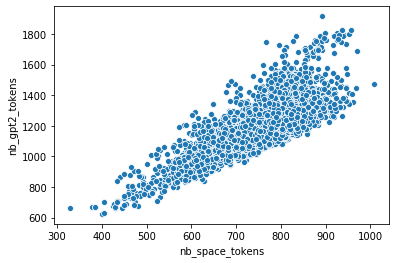

In [50]:
sns.scatterplot(x=stats['nb_space_tokens'], y=stats['nb_gpt2_tokens'], data=stats)

In [21]:
example_idx = stats['example_idx'][np.argmax(stats['nb_gpt2_tokens'])]
string_after_vectorization(novels_dataset[example_idx])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [22]:
example_idx = stats['example_idx'][np.argmin(stats['nb_gpt2_tokens'])]
string_after_vectorization(novels_dataset[example_idx])

c:\users\perso\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
string_after_vectorization(novels_dataset[10456])

'[P1] Elizabeth thought this was going pretty far; and she listened with increasing astonishment as the housekeeper added, “I have never known a cross word from him in my life, and I have known him ever since he was four years old.” This was praise, of all others most extraordinary, most opposite to her ideas. That he was not a good-tempered man had been her firmest opinion. Her keenest attention was awakened; she longed to hear more, and was grateful to her uncle for saying: “There are very few people of whom so much can be said. You are lucky in having such a master.” “Yes, sir, I know I am. If I were to go through the world, I could not meet with a better. But I have always observed, that they who are good-natured when children, are good-natured when they grow up; and he was always the sweetest-tempered, most generous-hearted boy in the world.” Elizabeth almost stared at her. “Can this be Mr. Darcy?” thought she. “His father was an excellent man,” said Mrs. Gardiner. “Yes, ma’am, th